In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
ams = pd.read_csv("data/amsterdam.csv")
ams['Amsterdam'] = 1
rott = pd.read_csv("data/rotterdam.csv")
rott['Rotterdam'] = 1
hague = pd.read_csv("data/hague.csv")
hague['The Hague'] = 1

dfs = [ams, rott, hague]

for df in dfs:
    df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

hague = hague[hague['price']<30000] # outliers in the hague, avg price was like $10000

6657
9234


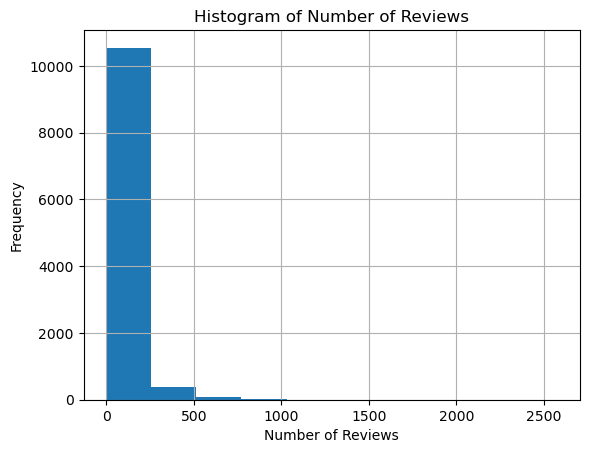

In [3]:
df_tot = pd.concat([ams, rott, hague], axis = 0)
print(df_tot['id'].nunique())
print(df_tot['host_id'].nunique())

df_tot['host_since'] = pd.to_datetime(df_tot['host_since'])
df_tot['host_since'].min()

# Create a histogram
df_tot['number_of_reviews'].hist()

# Display the plot
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Reviews')
plt.show()


In [4]:
df_tot['Amsterdam'] = df_tot['Amsterdam'].fillna(0)
df_tot['Hague'] = df_tot['The Hague'].fillna(0)
df_tot['Rotterdam'] = df_tot['Rotterdam'].fillna(0)



In [5]:
ams['n_amen'] = ams['amenities'].apply(len) # get number of amenities for next analysis

In [6]:
print(f"Dim AMS: {ams.shape}\nDim Rott:{rott.shape}\nDim Hague:{hague.shape}")

Dim AMS: (8945, 37)
Dim Rott:(1091, 34)
Dim Hague:(991, 36)


In [11]:
# Dataset is 75 cols, I reset the max columns displayed
pd.set_option('display.max_columns', 37)

In [27]:
ams['n_amen'].max()

1953

In [25]:
# REGRESSION ON N_AMENITIES
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

ams.dropna(inplace=True)
X = ams[['n_amen', 'accommodates', 'review_scores_location']]
y = ams['price']
model = LinearRegression()
model.fit(X,y)

# Get the coefficients (weights) of the model
coefficients = model.coef_
intercept = model.intercept_


# R-squared value
r_squared = model.score(X, y)
print("R-squared:", r_squared)

# Predictions
predictions = model.predict(X)

# Other attributes you might be interested in
# Residuals
residuals = y - predictions

# Mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, predictions)
print("Mean Squared Error:", mse)

# Summary statistics
import statsmodels.api as sm
X_sm = sm.add_constant(X)  # Add constant for intercept in statsmodels
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())

R-squared: 0.338576377696414
Mean Squared Error: 17633.11760716275
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     298.6
Date:                Mon, 24 Jun 2024   Prob (F-statistic):          1.62e-156
Time:                        04:54:07   Log-Likelihood:                -11064.
No. Observations:                1754   AIC:                         2.214e+04
Df Residuals:                    1750   BIC:                         2.216e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [9]:
df_tot['number_of_reviews'].idxmax()
df_tot.iloc['3286]

id                                                                    32485135.0
name                                                             Sleep in a Hub!
neighborhood_overview          CityHub Amsterdam is located right next to the...
host_id                                                                243087395
host_since                                                   2019-02-14 00:00:00
host_about                                                                   NaN
host_response_time                                                within an hour
host_response_rate                                                           99%
host_acceptance_rate                                                        100%
host_is_superhost                                                              t
host_total_listings_count                                                      2
host_has_profile_pic                                                           t
host_identity_verified      

In [10]:
ams['neighbourhood_cleansed'].nunique() # AMS has 22 neighbourhoods
ams['neighbourhood_cleansed'].isna().sum() # no NAs

0

In [11]:
ams.describe()

,id,host_id,host_total_listings_count,accommodates,beds,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,Amsterdam,n_amen
count,8.945000e+03,8.945000e+03,8945.000000,8945.000000,5445.000000,5454.000000,8945.000000,8945.000000,8945.000000,8945.000000,8945.000000,7990.000000,7987.000000,7986.000000,7987.000000,7987.000000,7987.000000,7987.000000,7985.000000,8945.0,8945.000000
mean,3.727065e+17,1.126967e+08,4.982448,2.913248,1.754454,256.565457,4.202571,352.561096,4.689435,71.207043,45.015428,4.837553,4.853811,4.771464,4.885559,4.903552,4.797908,4.647803,0.997711,1.0,575.978200
std,4.352412e+17,1.509640e+08,42.998609,1.368599,1.648297,244.978918,19.793345,443.051341,8.066550,103.851933,107.300698,0.254652,0.248602,0.326004,0.235342,0.224710,0.263176,0.327367,1.834241,0.0,322.850356
min,2.818000e+03,3.159000e+03,1.000000,1.000000,0.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010000,1.0,2.000000
25%,2.019096e+07,1.084440e+07,1.000000,2.000000,1.000000,150.000000,2.000000,20.000000,0.000000,0.000000,3.000000,4.770000,4.800000,4.670000,4.860000,4.890000,4.700000,4.500000,0.230000,1.0,317.000000
50%,4.894942e+07,3.821955e+07,1.000000,2.000000,1.000000,213.000000,3.000000,35.000000,0.000000,13.000000,9.000000,4.910000,4.920000,4.870000,4.960000,5.000000,4.870000,4.700000,0.450000,1.0,550.000000
75%,8.380000e+17,1.514146e+08,2.000000,4.000000,2.000000,300.000000,4.000000,365.000000,6.000000,106.000000,34.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.840000,0.940000,1.0,788.000000
max,1.110000e+18,5.653406e+08,1163.000000,16.000000,33.000000,10000.000000,1001.000000,1125.000000,30.000000,365.000000,2575.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,57.840000,1.0,1953.000000


In [12]:
hague.describe()

,id,host_id,host_total_listings_count,accommodates,beds,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,The Hague
count,9.910000e+02,9.910000e+02,991.000000,991.000000,970.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,882.000000,991.0
mean,3.433774e+17,1.449928e+08,21.575177,3.459132,2.263918,170.353179,4.749748,447.343088,10.120081,160.677094,43.184662,4.743647,4.769672,4.683182,4.862333,4.844972,4.808754,4.594066,1.185102,1.0
std,4.082079e+17,1.698884e+08,101.437806,1.789446,1.603156,123.443016,9.617951,455.895763,10.338352,131.269900,84.734423,0.322575,0.308633,0.401184,0.224085,0.249627,0.261314,0.378206,2.108940,0.0
min,1.038750e+05,1.493900e+04,1.000000,1.000000,1.000000,25.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.020000,1.0
25%,3.171269e+07,1.023988e+07,1.000000,2.000000,1.000000,100.000000,1.000000,30.000000,0.000000,28.500000,3.000000,4.610000,4.670000,4.550000,4.800000,4.790000,4.740000,4.495000,0.290000,1.0
50%,5.112712e+07,5.633362e+07,2.000000,3.000000,2.000000,148.000000,2.000000,365.000000,7.000000,150.000000,10.000000,4.830000,4.850000,4.790000,4.940000,4.950000,4.880000,4.670000,0.650000,1.0
75%,7.760000e+17,2.445204e+08,6.000000,4.000000,3.000000,204.000000,5.000000,1125.000000,20.000000,289.000000,41.000000,5.000000,5.000000,4.960000,5.000000,5.000000,5.000000,4.820000,1.480000,1.0
max,1.050000e+18,5.470572e+08,1604.000000,14.000000,13.000000,2000.000000,123.000000,1125.000000,30.000000,365.000000,994.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,46.740000,1.0


In [13]:
rott.describe()

,id,host_id,host_total_listings_count,accommodates,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,Rotterdam
count,1.091000e+03,1.091000e+03,1091.000000,1091.000000,1067.000000,907.000000,1091.000000,1091.000000,1091.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,1091.0
mean,3.898918e+17,1.585442e+08,10.788268,3.196150,2.246485,150.681367,6.278643,432.241063,41.760770,4.736222,4.761910,4.668342,4.833379,4.82639,4.773841,4.605845,1.253431,1.0
std,4.226570e+17,1.723786e+08,45.967840,2.094997,2.931708,118.990293,16.669736,447.703143,104.800722,0.362849,0.343463,0.404512,0.334898,0.36009,0.293905,0.406698,1.632364,0.0
min,7.315500e+04,8.531500e+04,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.020000,1.0
25%,3.392351e+07,2.046429e+07,1.000000,2.000000,1.000000,88.000000,2.000000,30.000000,3.000000,4.670000,4.680000,4.530000,4.800000,4.81000,4.670000,4.500000,0.310000,1.0
50%,5.342466e+07,7.322165e+07,2.000000,2.000000,2.000000,120.000000,2.000000,365.000000,11.000000,4.830000,4.860000,4.780000,4.930000,4.94000,4.850000,4.710000,0.740000,1.0
75%,8.265000e+17,2.917330e+08,5.000000,4.000000,2.000000,170.000000,4.000000,1125.000000,32.000000,5.000000,5.000000,4.940000,5.000000,5.00000,5.000000,4.850000,1.590000,1.0
max,1.050000e+18,5.501135e+08,1322.000000,16.000000,46.000000,1295.000000,365.000000,1125.000000,1902.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,30.320000,1.0


In [14]:
df_tot.tail()

,id,name,neighborhood_overview,host_id,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,...,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,Amsterdam,Rotterdam,The Hague,Hague
1200,1.050000e+18,Home in Den Haag · ★New · 3 bedrooms · 3 beds ...,"Sea beach: Zuiderstrand Den Haag, 3 km<br />Se...",360831279,2020-08-06,We are specialists in the rental of high-quali...,within an hour,100%,97%,t,1604,t,t,Koningsplein en omgeving,Entire home,Entire home/apt,5,...,1125,0.0,36.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN,0.0,0.0,1.0,1.0
1202,1.050000e+18,Home in Den Haag · ★New · 6 bedrooms · 12 beds...,NaN,207990919,2018-08-07,Friendly Asian guy,within a few hours,88%,27%,f,12,t,t,Dreven en Gaarden,Private room in home,Private room,12,...,365,15.0,244.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,0.0,0.0,1.0,1.0
1203,1.050000e+18,Rental unit in Den Haag · ★New · 1 bedroom · 1...,NaN,2182590,2012-04-20,"Rustig, sociaal en avontuurlijk.\nSoms even op...",within a day,67%,42%,f,2,t,t,Scheveningen Badplaats,Entire rental unit,Entire home/apt,2,...,365,6.0,6.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,0.0,0.0,1.0,1.0
1204,1.050000e+18,Home in Den Haag · ★New · 4 bedrooms · 4 beds ...,NaN,43275373,2015-09-03,NaN,NaN,NaN,NaN,f,2,t,t,Vogelwijk,Entire home,Entire home/apt,5,...,365,8.0,8.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,0.0,0.0,1.0,1.0
1205,1.050000e+18,Home in Den Haag · ★New · 3 bedrooms · 3 beds ...,"Quiet residential neigbourhood, with own cute ...",9947582,2013-11-11,"Hi, My name is Robert and Im 29 years old. I o...",NaN,NaN,NaN,f,2,t,t,Statenkwartier,Entire home,Entire home/apt,5,...,365,0.0,29.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,0.0,0.0,1.0,1.0


<Axes: >

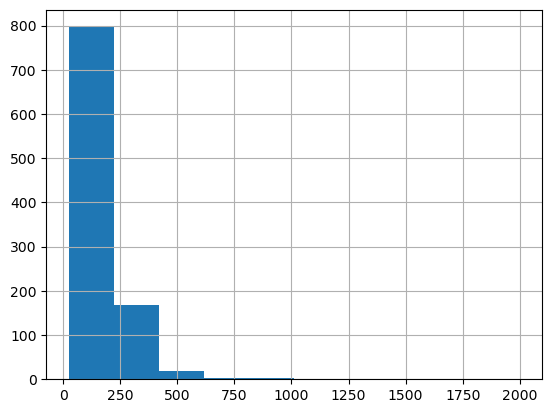

In [15]:
hague['price'].hist()

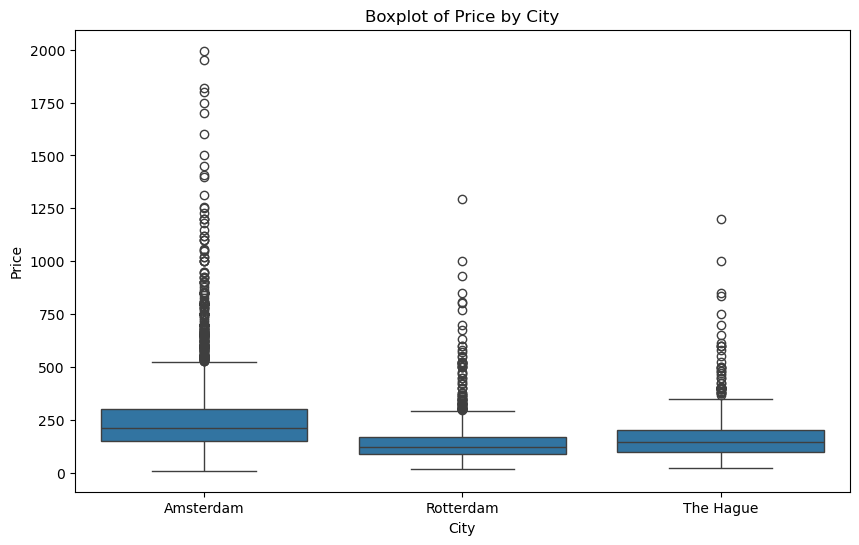

In [16]:
# Melt the DataFrame to long format
df_melted = df_tot.melt(id_vars=['price'], value_vars=['Amsterdam', 'Rotterdam', 'The Hague'], 
                        var_name='city', value_name='is_city')
df_melted = df_melted[df_melted['price']<2000]

# Filter out rows where 'is_city' is 0
df_filtered = df_melted[df_melted['is_city'] == 1]

# Drop the 'is_city' column as it's no longer needed
df_filtered = df_filtered.drop(columns='is_city')

custom_palette = ["#90ee90", "#ffa500", "#87ceeb"]  # Light green, orange, and sky blue
# Plot the boxplots using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='city', y='price', data=df_filtered)
plt.title('Boxplot of Price by City')
plt.xlabel('City')
plt.ylabel('Price')
plt.show()

### From now on I focus on Amsterdam

In [17]:
ams = pd.get_dummies(ams, columns=['neighbourhood_cleansed'], prefix = '')

In [18]:
ams.columns

Index(['id', 'name', 'neighborhood_overview', 'host_id', 'host_since',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'Amsterdam', 'n_amen', '_Bijlmer-Centrum', '_Bijlmer-Oost',
       '_Bos en Lommer', '_Buitenveldert - Zuidas', '_Centrum-Oost',
       '_Centrum-West', '_De Aker - Nieuw Sloten', '_De Baarsjes - Oud-West',
       '_De Pijp - Rivierenbuurt', '_Gaasperdam 

In [19]:
num_var = ams.select_dtypes(include='number')
correlation_matrix = num_var.corr()

# Extract correlations for the 'price' column
price_correlation = correlation_matrix['price'].drop('price')

# Sort the correlations by absolute value in descending order
sorted_price_correlation = price_correlation.abs().sort_values(ascending=False)

print("Variables most correlated with price:")
print(sorted_price_correlation)

Variables most correlated with price:
accommodates                   0.387078
beds                           0.305050
reviews_per_month              0.175898
number_of_reviews              0.165259
n_amen                         0.146500
review_scores_location         0.133895
availability_365               0.120508
availability_30                0.113272
review_scores_rating           0.108945
review_scores_communication    0.083147
id                             0.078494
review_scores_accuracy         0.077362
review_scores_checkin          0.077001
review_scores_cleanliness      0.056055
review_scores_value            0.054484
maximum_nights                 0.043794
host_id                        0.019761
host_total_listings_count      0.013481
minimum_nights                 0.012463
Amsterdam                           NaN
Name: price, dtype: float64


<Axes: >

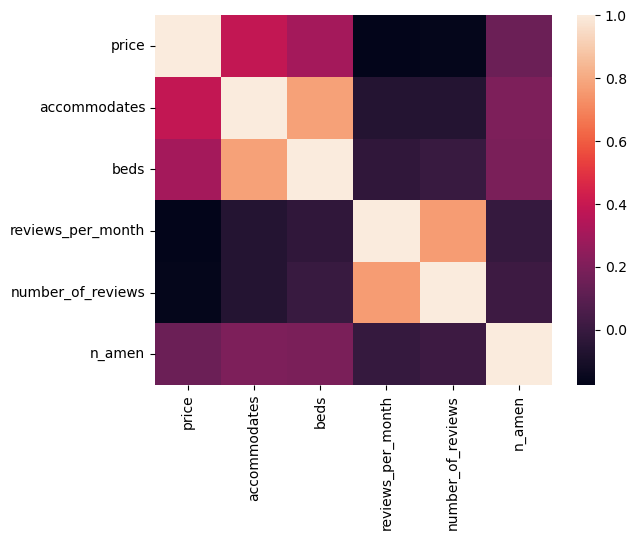

In [30]:
# Select specific columns
corr_df = ams[['price', 'accommodates', 'beds', 'reviews_per_month', 'number_of_reviews', 'n_amen']]
corr = corr_df.corr()
sns.heatmap(corr)

In [ ]:
corr = corr_df.corr()
sns.heatmap(corr)

In [52]:
neigh_mean_rev = df_tot.groupby('neighbourhood_cleansed')['number_of_reviews'].sum()
neigh_mean_rev_sorted = neigh_mean_rev.sort_values(ascending=False)
neigh_mean_rev_sorted

neighbourhood_cleansed
Centrum-West               85190
Centrum-Oost               62600
De Baarsjes - Oud-West     51452
De Pijp - Rivierenbuurt    36445
Zuid                       24157
                           ...  
Bosweide                       0
Rosenburg                      0
Dreven en Gaarden              0
Groente- en Fruitmarkt         0
Haagse Bos                     0
Name: number_of_reviews, Length: 184, dtype: int64

In [56]:
#### HIGHEST AVERAGE NUMBER OF REVIEWS
df_tot[df_tot['neighbourhood_cleansed']=='Erasmus Veld'] # Erasmus Veld is The Hague
df_tot[df_tot['neighbourhood_cleansed']== 'Dijkzigt'] # Dijkzigt is Rotterdam
df_tot[df_tot['neighbourhood_cleansed']== 'Laakhaven-Oost'] # The Hague   

### HIGHEST ABS NUMBER OF REVIEWS

df_tot[df_tot['neighbourhood_cleansed']=='Centrum-West']['Amsterdam'] # Erasmus Veld is The Hague
df_tot[df_tot['neighbourhood_cleansed']== 'Centrum-Oost']['Amsterdam'] # Dijkzigt is Rotterdam
df_tot[df_tot['neighbourhood_cleansed']== 'De Baarsjes - Oud-West']['Amsterdam'] # The Hague

26      1.0
28      1.0
33      1.0
38      1.0
40      1.0
       ... 
8894    1.0
8900    1.0
8908    1.0
8914    1.0
8928    1.0
Name: Amsterdam, Length: 1518, dtype: float64

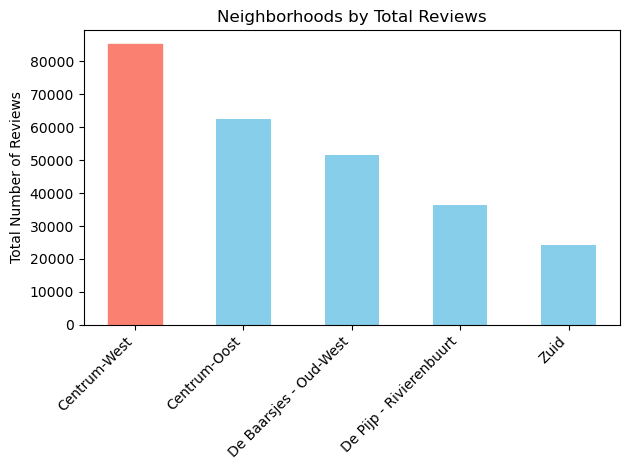

In [62]:
# Neighborhoods and their total number of reviews
neighborhoods = ['Centrum-West', 'Centrum-Oost', 'De Baarsjes - Oud-West', 'De Pijp - Rivierenbuurt', 'Zuid']
reviews = [85190, 62600, 51452, 36445, 24157]

# Sorting neighborhoods and reviews based on reviews (descending order)
neighborhoods_sorted, reviews_sorted = zip(*sorted(zip(neighborhoods, reviews), key=lambda x: x[1], reverse=True))

# Plotting the bar chart
fig, ax = plt.subplots()

# Bar positions and width
bar_positions = [1,2,3,4,5]
bar_width = 0.5

# Plot bars
bars = ax.bar(bar_positions, reviews_sorted, width=bar_width, align='center', color='skyblue')

# Set labels and title
ax.set_xticks(bar_positions)
ax.set_xticklabels(neighborhoods_sorted, rotation=45, ha='right')
ax.set_ylabel('Total Number of Reviews')
ax.set_title('Neighborhoods by Total Reviews')

# Highlight Centrum-West by making it a different color
bars[neighborhoods_sorted.index('Centrum-West')].set_color('salmon')

# Adjust layout to fit the labels properly
fig.tight_layout()

# Show the plot
plt.show()

In [65]:
ams.columns

Index(['id', 'name', 'neighborhood_overview', 'host_id', 'host_since',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'beds', 'amenities',
       'price', 'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month', 'Amsterdam'],
      dtype='object')

In [74]:
type_rating = ams.groupby('property_type')['review_scores_rating'].mean()
sorted_ratings = type_rating.sort_values(ascending=False)
sorted_ratings

# Yurt has only 1 review
# Tiny home has 7
# Private room has 5


property_type
Yurt                                  5.000000
Tiny home                             4.952857
Private room                          4.918000
Private room in bungalow              4.910000
Entire villa                          4.906667
Private room in nature lodge          4.895000
Barn                                  4.890000
Entire condo                          4.889863
Houseboat                             4.886486
Entire loft                           4.879000
Entire guest suite                    4.875161
Shared room in home                   4.873333
Entire townhouse                      4.867713
Entire guesthouse                     4.866522
Entire home                           4.865976
Private room in cabin                 4.865000
Private room in houseboat             4.864762
Private room in villa                 4.861250
Shared room in houseboat              4.856667
Entire rental unit                    4.850382
Room in serviced apartment            4.850000

In [78]:
nrev_type = ams.groupby('property_type')['review_scores_rating'].count()
nrev_sorted = nrev_type.sort_values(ascending=False)
nrev_sorted

property_type
Entire rental unit                    3272
Entire condo                          1459
Entire home                            676
Private room in rental unit            417
Private room in bed and breakfast      303
Entire townhouse                       223
Entire loft                            200
Private room in condo                  165
Houseboat                              148
Private room in home                   146
Room in hotel                          112
Room in boutique hotel                  93
Boat                                    87
Private room in houseboat               84
Private room in guest suite             82
Private room in townhouse               72
Entire serviced apartment               59
Private room in boat                    45
Private room in loft                    37
Entire guest suite                      31
Room in bed and breakfast               25
Shared room in hostel                   24
Entire guesthouse                       

In [79]:
ams.groupby('room_type')['price'].mean()

room_type
Entire home/apt    297.173826
Hotel room         174.583333
Private room       145.700141
Shared room        171.913043
Name: price, dtype: float64

C:\Users\lucap\AppData\Local\Temp\ipykernel_10892\3590428388.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(accommodation_types, rotation=45, ha='right')


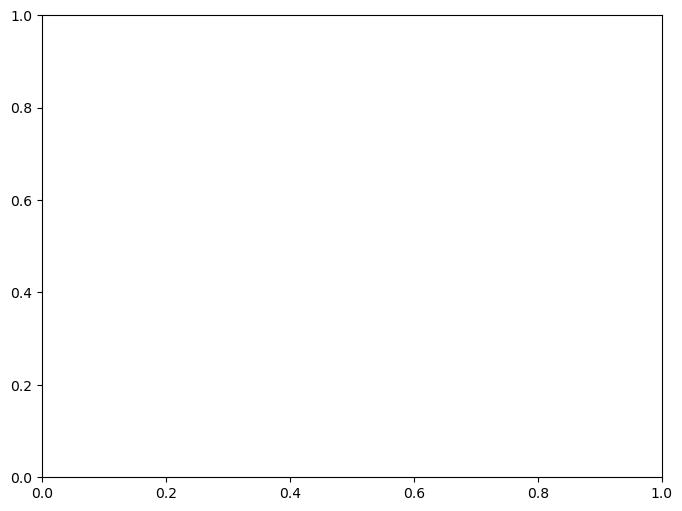

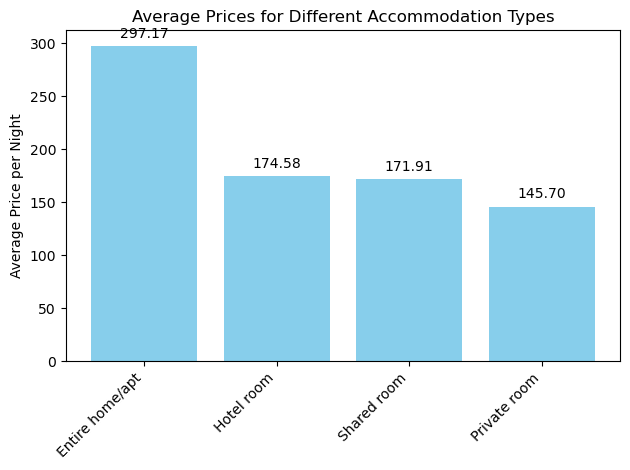

In [82]:
accommodation_types = ['Entire home/apt', 'Hotel room','Shared room' , 'Private room']
average_prices = [297.173826, 174.583333,  171.913043, 145.700141]

fig, ax = plt.subplots(figsize=(8, 6))  # Adjust size as needed
# Plotting the bar chart
fig, ax = plt.subplots()

# Plot bars
bars = ax.bar(accommodation_types, average_prices, color='skyblue')

# Adding labels and title
ax.set_ylabel('Average Price per Night')
ax.set_title('Average Prices for Different Accommodation Types')
ax.set_xticklabels(accommodation_types, rotation=45, ha='right')

# Adding text annotations on top of each bar
for bar, price in zip(bars, average_prices):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{price:.2f}', ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()

### PCA and Clustering

In [97]:
from sklearn.preprocessing import StandardScaler
ams_num = ams.select_dtypes(include='number')
ams_num = ams_num.dropna()
columns_to_drop = ['id', 'host_id', 'minimum_nights',
                  'maximum_nights','availability_365', 'Amsterdam']
ams_num.drop(columns=columns_to_drop, inplace=True)
# Assuming X is your dataset as a numpy array or pandas DataFrame
scaler = StandardScaler()
X_scaled = scaler.fit_transform(ams_num)

In [98]:
from sklearn.decomposition import PCA
# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit PCA to the scaled data
principal_components = pca.fit_transform(X_scaled)

# Extract the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained variance ratio: {explained_variance_ratio}')

Explained variance ratio: [0.33341962 0.1506291 ]


In [99]:
loadings = pca.components_
# Get feature names
feature_names = ams_num.columns

# Print associated variables (features) with loadings
for i, pc in enumerate(loadings):
    print(f"\nPrincipal Component {i+1}:")
    for j, feature in enumerate(feature_names):
        print(f"{feature}: {pc[j]}")


Principal Component 1:
host_total_listings_count: -0.055862113192550224
accommodates: -0.015799806473012264
beds: -0.028491099790909725
price: 0.058388032246088704
availability_30: -0.06481443645748507
number_of_reviews: -0.027375932352602335
review_scores_rating: 0.41591392312823877
review_scores_accuracy: 0.4045129584755939
review_scores_cleanliness: 0.3565445190891357
review_scores_checkin: 0.36447049322004277
review_scores_communication: 0.3861069028206261
review_scores_location: 0.3056406143000746
review_scores_value: 0.38318423552818354
reviews_per_month: -0.03944349227426035

Principal Component 2:
host_total_listings_count: -0.02842036477617312
accommodates: 0.5547021541301951
beds: 0.512181444649266
price: 0.41223804860425095
availability_30: -0.024667482272047167
number_of_reviews: -0.35520841194322217
review_scores_rating: 0.01757869130768152
review_scores_accuracy: -0.006361375862799456
review_scores_cleanliness: -0.05156802947302801
review_scores_checkin: -0.0092706294192

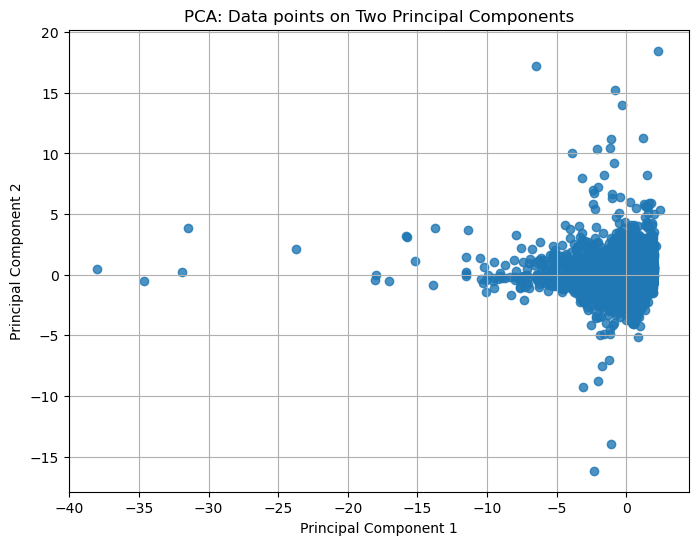

In [100]:
import matplotlib.pyplot as plt

# Plotting the principal components
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.8)
plt.title('PCA: Data points on Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [103]:
threshold = -20
filtered_indices = principal_components[:, 0] >= threshold

# Create filtered dataset
filtered_data = ams_num[filtered_indices]

# Check the shape of filtered data
print("Shape of filtered data:", filtered_data.shape)

Shape of filtered data: (4797, 14)


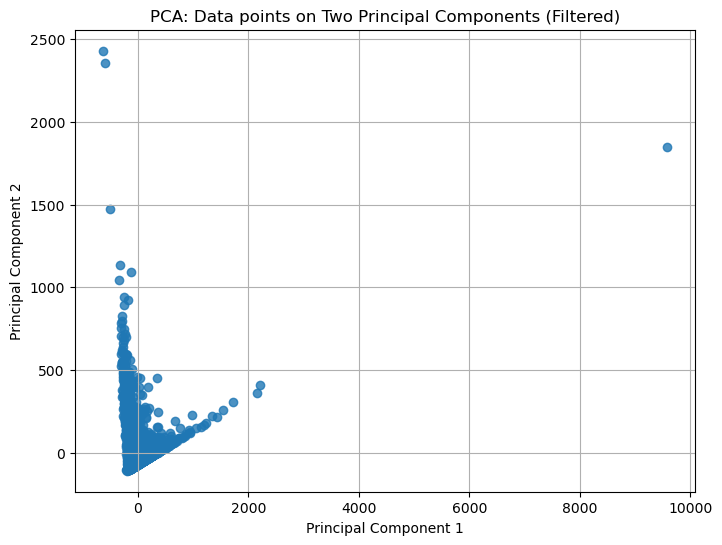

In [104]:
import matplotlib.pyplot as plt

# Perform PCA on the filtered data
pca_filtered = PCA(n_components=2)
principal_components_filtered = pca_filtered.fit_transform(filtered_data)

# Plotting the principal components
plt.figure(figsize=(8, 6))
plt.scatter(principal_components_filtered[:, 0], principal_components_filtered[:, 1], alpha=0.8)
plt.title('PCA: Data points on Two Principal Components (Filtered)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [105]:
ams.head()

,id,name,neighborhood_overview,host_id,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,...,amenities,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,Amsterdam
0,262394.0,Charming Studio with Roof Terrace,Close to the old Center of Amsterdam<br />Clos...,1376607,11/6/2011,"Hallo, My name is Martin. I like to travel wit...",NaN,NaN,NaN,f,3,t,t,Zuid,Private room in rental unit,Private room,2,...,"[""Kitchen"", ""Paid parking off premises"", ""Sham...",NaN,3,30,0,0,113,4.83,4.83,4.86,4.98,4.95,4.69,4.66,f,0.78,1
1,283170.0,5-bedrooms house; central location,NaN,1451657,11/28/2011,We love traveling and providing the best servi...,within an hour,100%,89%,f,1,t,t,Zuid,Entire rental unit,Entire home/apt,8,...,"[""Children\u2019s dinnerware"", ""Rice maker"", ""...",950.0,2,90,0,0,124,4.51,4.55,4.56,4.71,4.82,4.73,4.09,f,0.85,1
2,286500.0,"Centre, canal view with private bathroom",Residents live in the heart of the city - but ...,1491565,12/10/2011,I lived in Switserland and London(UK) before I...,within an hour,100%,99%,t,2,t,t,Centrum-West,Private room in rental unit,Private room,2,...,"[""Waterfront"", ""First aid kit"", ""Wifi"", ""Smoke...",148.0,3,365,1,188,373,4.91,4.96,4.92,4.94,4.92,4.92,4.81,t,2.53,1
3,290701.0,"Central, big window, rear room with private bath.",The home is in the heart of the city but is su...,1491565,12/10/2011,I lived in Switserland and London(UK) before I...,within an hour,100%,99%,t,2,t,t,Centrum-West,Private room in home,Private room,2,...,"[""Children\u2019s dinnerware"", ""Waterfront"", ""...",138.0,3,365,3,220,448,4.86,4.92,4.91,4.93,4.90,4.92,4.75,t,3.05,1
4,291752.0,Cozy & large bohemian style room,It is a calm yet atmospheric residential area ...,1511330,12/16/2011,I love the city of Amsterdam and like to share...,within a few hours,100%,100%,t,1,t,t,Oud-Oost,Private room in rental unit,Private room,2,...,"[""Sound system"", ""Refrigerator"", ""Wifi"", ""Coff...",125.0,3,1125,13,274,253,4.87,4.94,4.84,4.93,4.93,4.78,4.73,f,1.70,1


In [108]:
#X = ams[['n_amen','accomodates','review_score_location']]
ams

,id,name,neighborhood_overview,host_id,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,...,amenities,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,Amsterdam
0,2.623940e+05,Charming Studio with Roof Terrace,Close to the old Center of Amsterdam<br />Clos...,1376607,11/6/2011,"Hallo, My name is Martin. I like to travel wit...",NaN,NaN,NaN,f,3,t,t,Zuid,Private room in rental unit,Private room,2,...,"[""Kitchen"", ""Paid parking off premises"", ""Sham...",NaN,3,30,0,0,113,4.83,4.83,4.86,4.98,4.95,4.69,4.66,f,0.78,1
1,2.831700e+05,5-bedrooms house; central location,NaN,1451657,11/28/2011,We love traveling and providing the best servi...,within an hour,100%,89%,f,1,t,t,Zuid,Entire rental unit,Entire home/apt,8,...,"[""Children\u2019s dinnerware"", ""Rice maker"", ""...",950.0,2,90,0,0,124,4.51,4.55,4.56,4.71,4.82,4.73,4.09,f,0.85,1
2,2.865000e+05,"Centre, canal view with private bathroom",Residents live in the heart of the city - but ...,1491565,12/10/2011,I lived in Switserland and London(UK) before I...,within an hour,100%,99%,t,2,t,t,Centrum-West,Private room in rental unit,Private room,2,...,"[""Waterfront"", ""First aid kit"", ""Wifi"", ""Smoke...",148.0,3,365,1,188,373,4.91,4.96,4.92,4.94,4.92,4.92,4.81,t,2.53,1
3,2.907010e+05,"Central, big window, rear room with private bath.",The home is in the heart of the city but is su...,1491565,12/10/2011,I lived in Switserland and London(UK) before I...,within an hour,100%,99%,t,2,t,t,Centrum-West,Private room in home,Private room,2,...,"[""Children\u2019s dinnerware"", ""Waterfront"", ""...",138.0,3,365,3,220,448,4.86,4.92,4.91,4.93,4.90,4.92,4.75,t,3.05,1
4,2.917520e+05,Cozy & large bohemian style room,It is a calm yet atmospheric residential area ...,1511330,12/16/2011,I love the city of Amsterdam and like to share...,within a few hours,100%,100%,t,1,t,t,Oud-Oost,Private room in rental unit,Private room,2,...,"[""Sound system"", ""Refrigerator"", ""Wifi"", ""Coff...",125.0,3,1125,13,274,253,4.87,4.94,4.84,4.93,4.93,4.78,4.73,f,1.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,1.110000e+18,Lovely stay,NaN,28916643,3/7/2015,Hi I am Nadia. Born and raised in Amsterdam an...,NaN,NaN,NaN,f,3,f,t,Slotervaart,Entire rental unit,Entire home/apt,2,...,"[""Kitchen"", ""Wifi"", ""Paid parking on premises""...",250.0,1,365,29,269,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,1
8941,1.110000e+18,Cozy apartment on hot spot.,NaN,50711042,12/7/2015,NaN,within an hour,100%,82%,f,5,t,t,Centrum-Oost,Entire rental unit,Entire home/apt,2,...,"[""Waterfront"", ""First aid kit"", ""Wifi"", ""Smoke...",245.0,1,365,22,242,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN,1
8942,1.110000e+18,Great stay at top location.,"You can arrive with the car, park it on the st...",50711042,12/7/2015,NaN,within an hour,100%,82%,f,5,t,t,Centrum-Oost,Entire rental unit,Entire home/apt,2,...,"[""ROOMSELLER SHORT STAY stainless steel single...",341.0,1,365,25,239,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN,1
8943,1.110000e+18,Huis met de krul,NaN,563944736,2/25/2024,"Wij zijn een familie van 4: Cathalijne, Cees e...",NaN,NaN,NaN,f,1,t,t,IJburg - Zeeburgereiland,Entire rental unit,Entire home/apt,4,...,"[""Outdoor dining area"", ""Wifi"", ""Microwave"", ""...",199.0,2,90,17,268,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,1
